# "Космический Титаник"
Фантастическая задачка по анализу данных и ML-моделированию на платформе Kaggle. В далеком будущем космический корабль Титаник летит куда-то в космосе. На борту несколько тысяч пассажиров. И вот что-то случилось - корабль пролетел толи через кротовую нору, то ли через магнитную аномалию - бог весть, что в этом далеком космосе может быть - и часть пассажиров попросту исчезло, а точнее - было перенесено в другое измерение. Целевой признак - Transported.  
Наша задача - определить вероятность исчезновения по данным. 

In [1]:
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning
from sklearn.impute import SimpleImputer

# Feature Engigeering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Spliting
from sklearn.model_selection import train_test_split, GridSearchCV

# Mashine Leaning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Data Description
**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  
**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.  
**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  
**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.  
**Destination** - The planet the passenger will be debarking to.  
**Age** - The age of the passenger.  
**VIP** - Whether the passenger has paid for special VIP service during the voyage.  
**RoomService**, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  
**Name** - The first and last names of the passenger.  
**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### Analysing

In [4]:
train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

C:\Users\matej\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


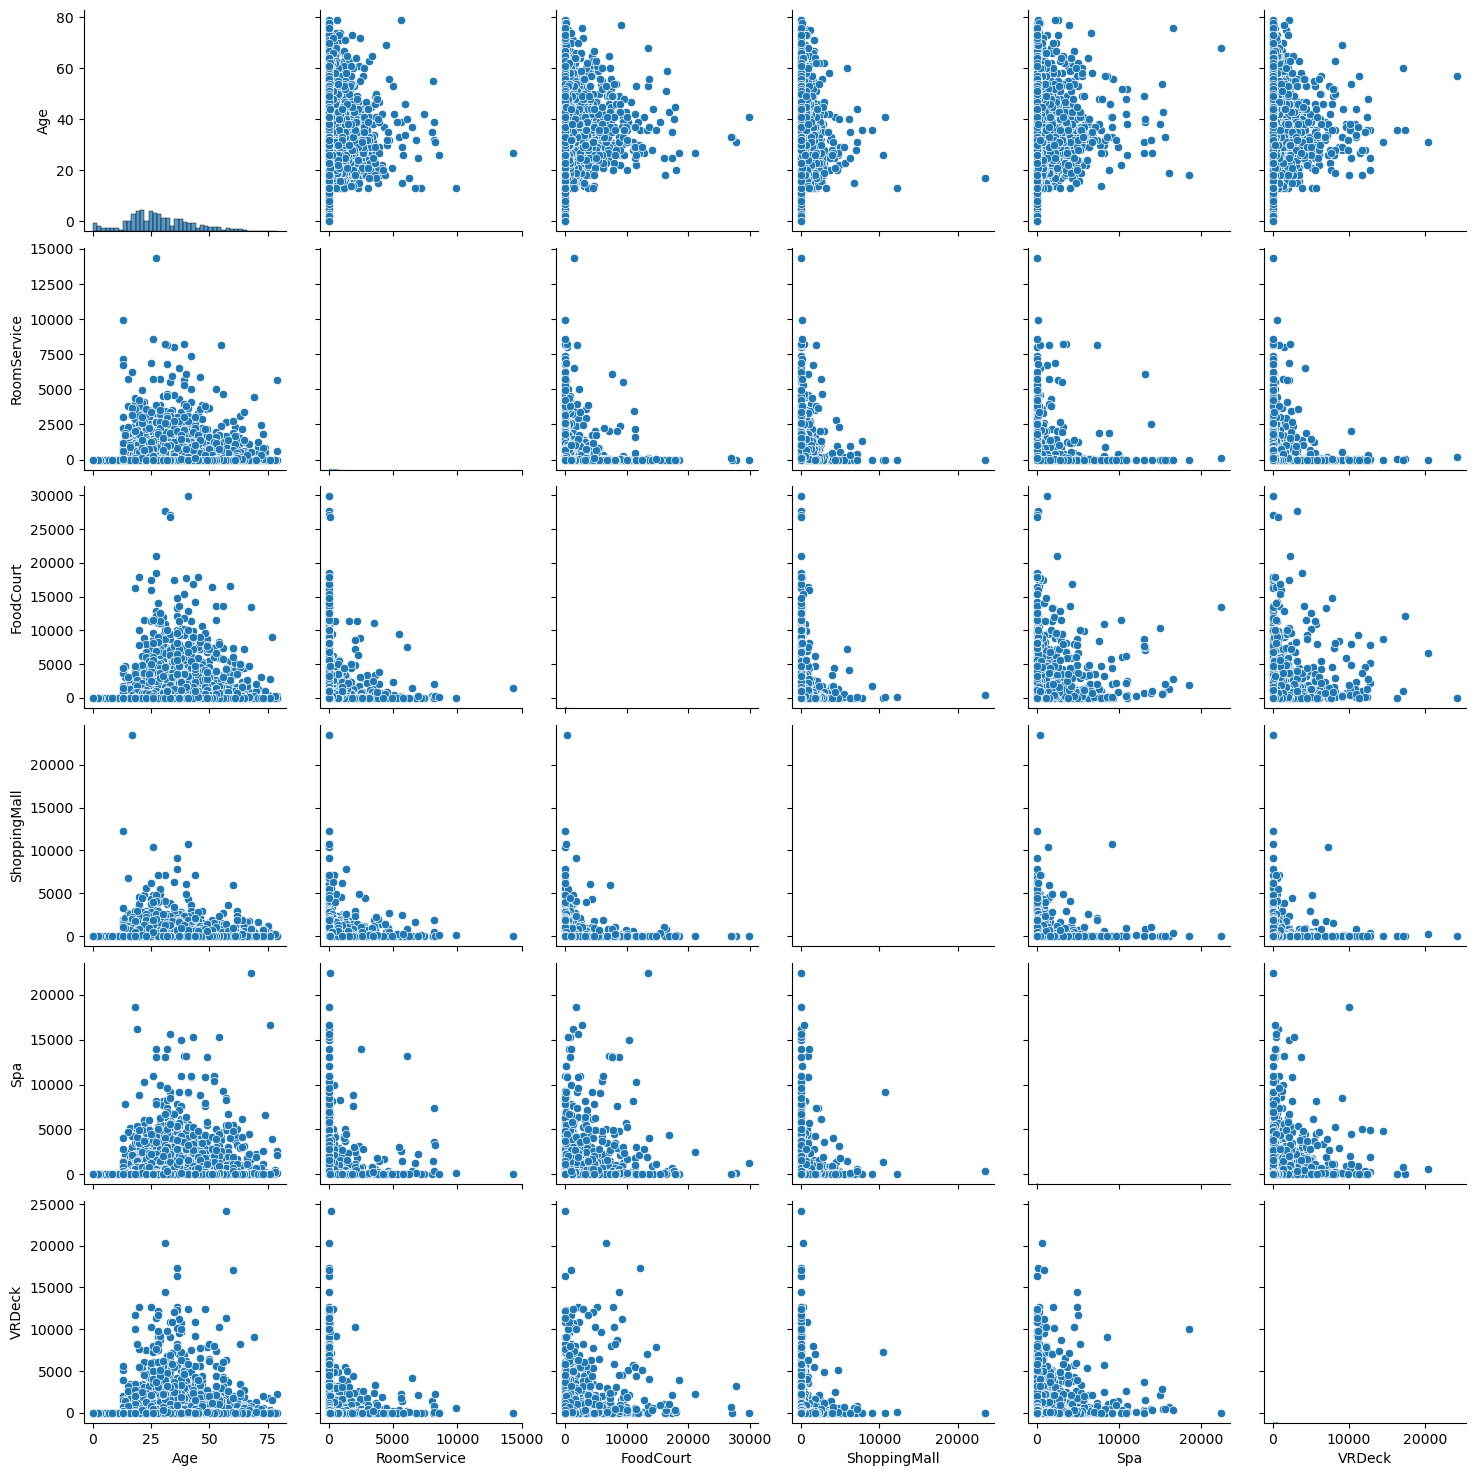

In [7]:
sns.pairplot(train[numeric_columns])
plt.show()

In [8]:
correlation_matrix = train.select_dtypes(include=['float64', 'int']).corr()
correlation_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


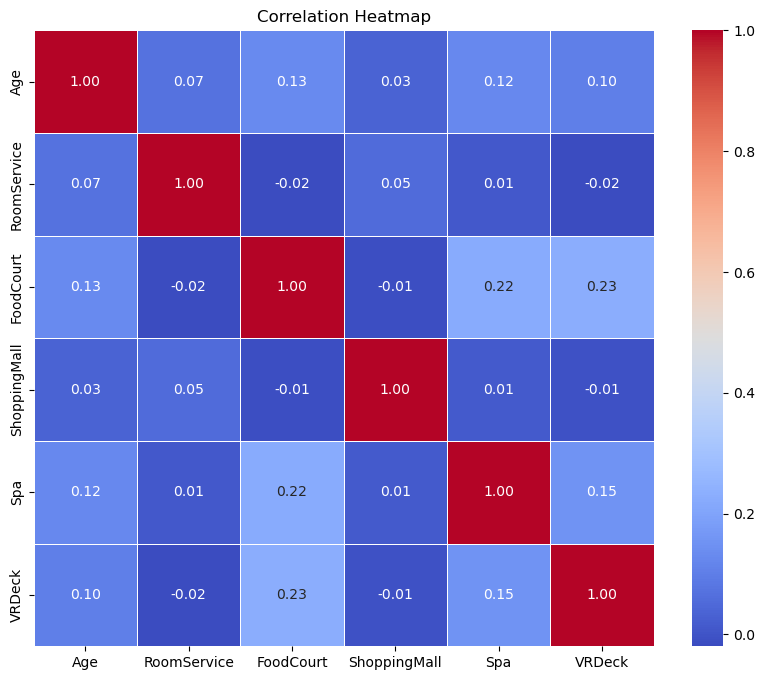

In [9]:
correlation_matrix = train.select_dtypes(include=['float64', 'int']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
train['Age_category'] = train['Age'].apply(lambda x: 'young' if x < 18 else('old' if x > 50 \
                                                                            else('unknown' if pd.isna(x) else 'middle')))

In [12]:
train['Expence'] = train [['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [13]:
train[['fName', 'lName']] = train['Name'].str.split(' ', expand=True)

In [14]:
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)

In [15]:
train[['Section', 'Person']] = train['PassengerId'].str.split('_', expand=True)

In [16]:
#Function to preprocess data
def process(df):
    df['Age_category'] = df['Age'].apply(lambda x: 'young' if x < 18 else('old' if x > 50 \
    else('unknown' if pd.isna(x) else 'middle')))
    df['Expence'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    df[['fName', 'lName']] = df['Name'].str.split(' ', expand=True)
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df[['Section', 'Person']] = df['PassengerId'].str.split('_', expand=True)

In [17]:
process(test)

### Data Cleaning

In [18]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Age_category      0
Expence           0
fName           200
lName           200
Deck            199
Num             199
Side            199
Section           0
Person            0
dtype: int64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Age_category  8693 non-null   object 
 15  Expence       8693 non-null   float64
 16  fName         8493 non-null   object 
 17  lName         8493 non-null   object 
 18  Deck          8494 non-null 

In [20]:
train['Num'] = train['Num'].str.replace("'","").astype(float)

In [21]:
train['Section'] = train['Section'].str.replace("'", "").astype(float)

In [22]:
train['Person'] = train['Person'].str.replace("'", "").astype(float)

In [23]:
numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expence', 'Num', 'Section', 'Person']
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Age_category', 'fName', 'lName', 'Deck', 'Side', 'Name']

In [24]:
# Using SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

In [25]:
train[numeric_columns] = imputer.fit_transform(train[numeric_columns])

In [26]:
train['Expence'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [27]:
imputer = SimpleImputer(strategy='most_frequent')

In [28]:
train[categorical_columns] = imputer.fit_transform(train[categorical_columns])

In [29]:
train['Len_Name'] = train['Name'].apply(len)

In [30]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Age_category      0
Expence           0
fName             0
lName             0
Deck              0
Num               0
Side              0
Section           0
Person            0
Len_Name          0
dtype: int64

In [31]:
# Function for cleaning
def cleaning(df):
    df['Num'] = df['Num'].str.replace("'","").astype(float)
    df['Section'] = df['Section'].str.replace("'", "").astype(float)
    df['Person'] = df['Person'].str.replace("'", "").astype(float)
    imputer = SimpleImputer(strategy = 'mean')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    df['Expence'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
    df['Len_Name'] = df['Name'].apply(len)

In [32]:
cleaning(test)

### Outlines

Протестировал - сила прогноза снижается. Но оставляю для будущих работ.

In [33]:
def smooth_outliers(df, columns, alpha=1.5):
    for column in columns:
        # Вычисляем квантили 25% и 75%
        q25, q75 = df[column].quantile(0.25), df[column].quantile(0.75)

        # Вычисляем межквартильное расстояние (IQR)
        iqr = q75 - q25

        # Вычисляем границы выбросов
        lower_bound = q25 - alpha * iqr
        upper_bound = q75 + alpha * iqr

        # Заменяем выбросы на верхний/нижний предел
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

### Feature Engineering

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Age_category  8693 non-null   object 
 15  Expence       8693 non-null   float64
 16  fName         8693 non-null   object 
 17  lName         8693 non-null   object 
 18  Deck          8693 non-null 

In [35]:
le_col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Age_category', 'Side']
ohe_col = ['fName', 'lName', 'Deck']
sc_col = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expence', 'Num', 'Section', 'Person', 'Len_Name']

In [36]:
le = LabelEncoder()

In [37]:
for col in le_col:
    train[col] = le.fit_transform(train[col])

In [38]:
ohe = OneHotEncoder(sparse=False)

In [39]:
for col in ohe_col:
    train[col] = ohe.fit_transform(train[col].values.reshape(-1, 1))

In [40]:
sc = StandardScaler()

In [41]:
train[sc_col] = sc.fit_transform(train[sc_col])

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int32  
 2   CryoSleep     8693 non-null   int32  
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int32  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Age_category  8693 non-null   int32  
 15  Expence       8693 non-null   float64
 16  fName         8693 non-null   float64
 17  lName         8693 non-null   float64
 18  Deck          8693 non-null 

In [43]:
columns_to_drop = ['Cabin', 'Name']
train.drop(columns=columns_to_drop, inplace=True)

In [44]:
# function for tranform features:
def transform_features(df):
    for col in le_col:
        df[col] = le.fit_transform(df[col])
    for col in ohe_col:
        df[col] = ohe.fit_transform(df[col].values.reshape(-1, 1))
    df[sc_col] = sc.fit_transform(df[sc_col])
    df.drop(columns=columns_to_drop, inplace=True)

In [45]:
transform_features(test)

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   int32  
 2   CryoSleep     4277 non-null   int32  
 3   Destination   4277 non-null   int32  
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int32  
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Age_category  4277 non-null   int32  
 12  Expence       4277 non-null   float64
 13  fName         4277 non-null   float64
 14  lName         4277 non-null   float64
 15  Deck          4277 non-null   float64
 16  Num           4277 non-null   float64
 17  Side          4277 non-null   int32  
 18  Section       4277 non-null 

### Data Splitting

Здесь возможно работать как с .values так и без - можно протестировать!

In [47]:
X = train.drop(columns=['PassengerId', 'Transported'], axis=1)
y = train['Transported']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Selection

In [49]:
models = []
models.append(('Log_regression', LogisticRegression()))
models.append(('clf_l1_LR', LogisticRegression(penalty='l1', tol=0.01, solver='saga')))
models.append(('clf_l2_LR', LogisticRegression(penalty='l2', tol=0.01, solver='saga')))
models.append(('Des_Tree', DecisionTreeClassifier()))
models.append(('Des_Tree_reg1', DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)))
models.append(('Ran_Forest', RandomForestClassifier()))
models.append(('Ran_Forest_reg1', RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=5,
                                                         min_samples_leaf=5, max_features='sqrt')))
models.append(('Ran_Forest_reg2', RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_split=5,
                                                         min_samples_leaf=5, max_features='sqrt')))
models.append(('XGB', XGBClassifier()))
models.append(('KNeig', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))

models.append(('MLP-1000', MLPClassifier(max_iter=1000)))

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    mean_accuracy = cv_results.mean()
    print(f'{name}, средняя точность: {mean_accuracy:.4f}')

Log_regression, средняя точность: 0.7956
clf_l1_LR, средняя точность: 0.7949
clf_l2_LR, средняя точность: 0.7946
Des_Tree, средняя точность: 0.7527
Des_Tree_reg1, средняя точность: 0.7818
Ran_Forest, средняя точность: 0.8054
Ran_Forest_reg1, средняя точность: 0.7931
Ran_Forest_reg2, средняя точность: 0.7915
XGB, средняя точность: 0.7951
KNeig, средняя точность: 0.7704
SGD, средняя точность: 0.7824
MLP-1000, средняя точность: 0.7975


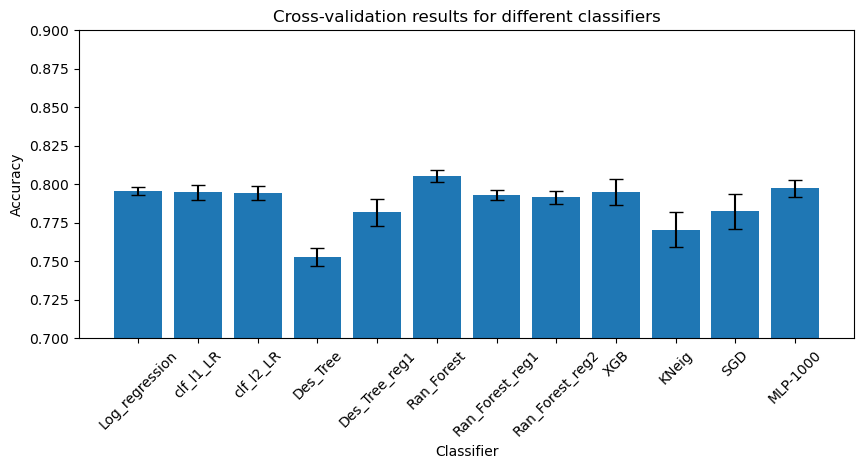

In [50]:
#Bar Plot to analyse the results
plt.figure(figsize=(10, 4))
plt.bar(names, [result.mean() for result in results], yerr=[result.std() for result in results], capsize=5)
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.title('Cross-validation results for different classifiers')
plt.show()

### Model Training

In [51]:
model = models[11][1]
model

MLPClassifier(max_iter=1000)

In [52]:
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

### Prediction

In [53]:
prediction = model.predict(test.drop(columns='PassengerId'))
test['Transported'] = prediction
submission = test[['PassengerId', 'Transported']]

In [54]:
submission.to_csv('submission.csv', index=False)